In [15]:
import requests
from bs4 import BeautifulSoup as bs
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [16]:
ALL_LISTINGS = []

# Number of pages we want to scrape
PAGES = 10

# Iterating over each page from the website within our desired range
for PAGE in range(1, PAGES + 1):
    TARGET_URL = f'https://www.avito.ma/fr/maroc/voitures?o={PAGE}'
    HEADERS = {'user-agent' : "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/144.0.0.0 Safari/537.36"}
    RESPONSE = requests.get(TARGET_URL, headers=HEADERS)
    PAGE_CONTENT = bs(RESPONSE.content, "html.parser")
    LISTINGS = PAGE_CONTENT.find_all("a", class_="sc-1jge648-0")

    # iterating over each listing car in the page
    for LISTING in LISTINGS:

        # Title
        TITLE = LISTING.find("p" , class_="sc-1x0vz2r-0 iHApav")
        TITLE = TITLE.text.strip() if TITLE else "N/A"

        # Listing type and the location
        TYPE_LOCATION = LISTING.find("div", class_="sc-b57yxx-10 fHMeoC")
        TYPE_LOCATION = TYPE_LOCATION.text.strip() if TYPE_LOCATION else "N/A"
        TYPE_LOCATION = TYPE_LOCATION.split(" dans ")
        TYPE = TYPE_LOCATION[0]
        LOCATION = TYPE_LOCATION[1]

        # Date of the listing
        DATE = LISTING.find("p", class_="sc-1x0vz2r-0 layWaX")
        DATE = DATE.text.strip() if DATE else "N/A"

        # Tags
        TAGS = LISTING.find_all("span", class_="sc-1s278lr-0 cAiIZZ")
        TAGS = [TAG.text.strip() for TAG in TAGS] if TAGS else []

        # Separating the tags to transmission, year, fuel
        try :
            YEAR = TAGS[0]
            TRANSMISSION = TAGS[1]
            FUEL = TAGS[2]
        except IndexError:
            YEAR = "N/A"
            TRANSMISSION = "N/A"
            FUEL = "N/A"

        # Owner
        OWNER = LISTING.find("p", class_="sc-1x0vz2r-0 hNCqYw sc-5rosa-7 hHZQmC")
        OWNER = OWNER.text.strip() if OWNER else "-"

        # link of the listing
        LINK = LISTING.get("href") if LISTING and LISTING.get("href") else "N/A"
        
        # Appending all the data to our listings list
        ALL_LISTINGS.append({
            "type_annonce" : TYPE,
            "titre" : TITLE,
            "location" : LOCATION,
            "date" : DATE,
            "annee" : YEAR,
            "transmission" : TRANSMISSION,
            "carburant" : FUEL,
            "proprietere" : OWNER,
            "lien" : LINK
        })
    # Waiting a bit
    #time.sleep(1.5)

In [17]:
df = pd.DataFrame(ALL_LISTINGS)

# Cleaning the data 
df['titre'] = df['titre'].str.lower()
df['location'] = df['location'].str.lower()
df["ville"] = df["location"].str.split(",").str[0]
df["quartier"] = df["location"].str.split(",").str[1]
df["quartier"] = df["quartier"].str.lstrip(" ")
df['annee'] = pd.to_numeric(df['annee'], errors='coerce')
df['annee'] = df['annee'].astype('Int64') 

# Droping 'location' column
df = df.drop(columns='location')

# Organizing the columns
df = df.reset_index(drop=True)
df = df[['titre', 'type_annonce','ville' ,'quartier', 'annee', 'carburant', 'transmission', 'date', 'proprietere', 'lien']]

# Saving the final result
df.to_csv("../data/avito_listings_light.csv", index=0)

In [18]:
df.head()

,titre,type_annonce,ville,quartier,annee,carburant,transmission,date,proprietere,lien
0,mercedes classe a,Voitures d'occasion,larache,toute la ville,2020,Diesel,Automatique,il y a 1 heure,Yassin Chaib,https://www.avito.ma/fr/larache/voitures_d_occ...
1,audi q3 sline diesel automatique 2018 à fès,Voitures d'occasion,fès,agdal,2018,Diesel,Automatique,il y a 6 heures,Particulier,https://www.avito.ma/fr/agdal/voitures_d_occas...
2,stellantis - jeep compass - 2025,Voitures d'occasion,bouskoura,bouskoura centre,2025,Hybride,Automatique,il y a 2 heures,Stellantis You Casablanca,https://www.avito.ma/fr/bouskoura_centre/voitu...
3,volvo xc60 diesel automatique 1 er main ✋️,Voitures d'occasion,casablanca,aïn chock,2014,Diesel,Automatique,il y a 5 minutes,Auto Simo,https://www.avito.ma/fr/aïn_chock/voitures_d_o...
4,ford fiesta,Voitures d'occasion,casablanca,ain sebaa,2021,Diesel,Manuelle,il y a 5 minutes,Voitures particuliers certifiées,https://www.avito.ma/fr/ain_sebaa/voitures_d_o...


In [19]:
# Cities with the most traffic
print("Top 10 villes aves le plus nombre des annonces:\n")
print(df['ville'].value_counts().head(10))

# Most used fuel types
print("Nombre de vehicules par carburant:\n")
print(df['carburant'].value_counts())

Top 10 villes aves le plus nombre des annonces:

ville
casablanca    171
marrakech      36
rabat          35
agadir         23
tanger         19
fès            17
kénitra        12
meknès         11
temara          9
oujda           6
Name: count, dtype: int64
Nombre de vehicules par carburant:

carburant
Diesel        264
N/A            55
Essence        36
Hybride        23
Electrique      2
Name: count, dtype: int64


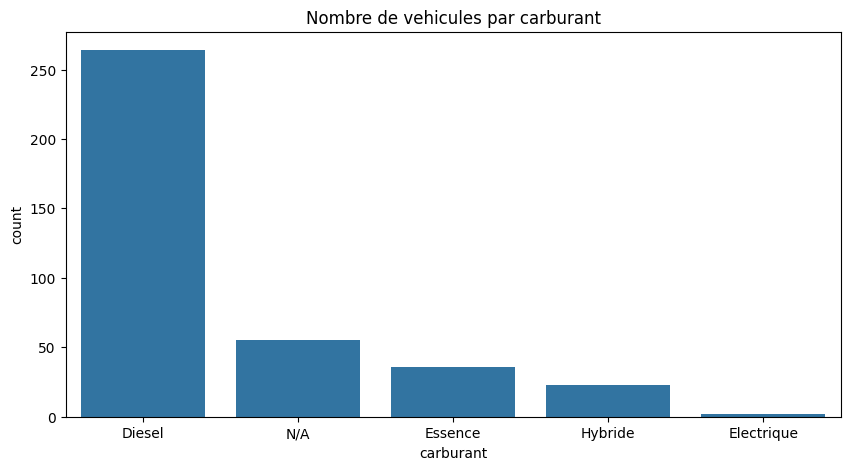

In [20]:
plt.figure(figsize=(10, 5))
sns.countplot(
    x = 'carburant',
    data = df,
    order = df['carburant'].value_counts().index[:10]
)
plt.title("Nombre de vehicules par carburant")
plt.show()

In [21]:
plt.figure(figsize=(10, 5))
sns.countplot(
    x = 'modele',
    data = df,
    order = df['modele'].value_counts().index[:20]
)
plt.title("Nombre de vehicules par Modele")
plt.show()

KeyError: 'modele'

<Figure size 1000x500 with 0 Axes>